In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import naive_bayes
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm, metrics
dftrain = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML- Classifiers/NB (Naive Bayes)/train.csv')
#dftest = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML- Classifiers/NB (Naive Bayes)/test.csv') #has no y
def do_stuff(df):
  df.drop(columns=['Name', 'SibSp', 'Parch', 'Embarked', 'PassengerId', 'Cabin', 'Ticket'], inplace=True)
  df['Sex']=df['Sex'].map({'male':0, 'female':1})
  df['Age']=df['Age'].fillna(df['Age'].mean())
  X = df.drop(columns=['Survived'])
  y = df['Survived']
  return X, y
X, y = do_stuff(dftrain)
y.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [198]:
acc = 0
for _ in range(100):
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.85)
  model = naive_bayes.BernoulliNB()
  model.fit(X_train, y_train)
  #print(model.score(X_test, y_test))
  acc = acc + model.score(X_test, y_test)
acc / 100

0.7859701492537314

Thus our model has a precision of 0.785 (78.5%);
By always outputting 0 we can get 0.616 (61.6%) called recall

Using the formula for F1 we can calculate an actual score
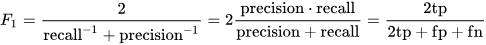

Thus F1 is equal to aproximately 0.684 (68.4% accuracy on even dataset)

In [211]:
acc = 0
for _ in range(15):
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.85)
  model = KNeighborsClassifier(n_neighbors=7)
  model.fit(X_train, y_train)
  #print(model.score(X_test, y_test))
  acc = acc + model.score(X_test, y_test)
acc / 15 #worse accuracy

0.7059701492537315

In [201]:
acc = 0
for _ in range(1):
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.85)
  model = svm.SVC(kernel='linear')
  model.fit(X_train, y_train)
  y_predict = model.predict(X_test)
  acc = acc+ metrics.accuracy_score(y_test, y_predict)
acc #about same accuracy but a lot slower

0.7835820895522388